In [1]:
%matplotlib inline
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import io, signal # we will also import the signal module, from scipy

 ## Table Of Contents 
1. [Introduction and Background](#intro)
- [Research Question and Hypothesis](#hypothesis)
- [Data Description](#desc)
- [Data Pre-processing](#process)
- [Data Analysis](#analyze)
- [Data Results](#results)
- [Conclusions and Discussions](#conclude)
- [Considerations and Limitations](#considerations)
- [References](#refer)

<a id='intro'></a>
## Introduction

In recent years, there has been an increase in literature devoted to understanding the functional contributions of neural oscillations. Many of these studies investigate the relationship between brain regions and synchronous neural oscillations and their role in motor processes (Salenius, S., & Hari, R, 2003; MacKay, W. A., 1997).
It is suspected that synchronous neural oscillations that occur globally rather than locally give rise to conscious awareness (Ward, L.M., 2003).


<a id='hypothesis'></a>
## Research Question & Hypothesis

**Research Question:** How do oscillation frequencies compare during slow wave sleep and wakefulness across the brain regions? Is there an oscillatory basis for consciousness? 

**Hypothesis:**


<a id='desc'></a>

## Dataset

### Monkey Resting ECoG Data
Recorded from monkey whole cortex. ECoG sampled at 1000Hz, 3 channels. From **Yanagawa et al., PLOS ONE, 2013.**

In this experiment, the monkey is sitting in a chair with no task demands. 5 minutes of data each are provided during 3 different stages: awake eyes open, awake eyes closed, and anesthesized. They are stored in `ecog_eyesopen`,`ecog_eyesclosed`, and `ecog_anes` respectively. The sampling rate is provided, from which you can compute the time vectors (they can have their own time vectors all starting from 0s).

`labels` contains information about which brain regions the 3 channels are located in, while `elec_num` has the electrode number, which you can find on the brain map image included in the same folder (brainmap.jpg).

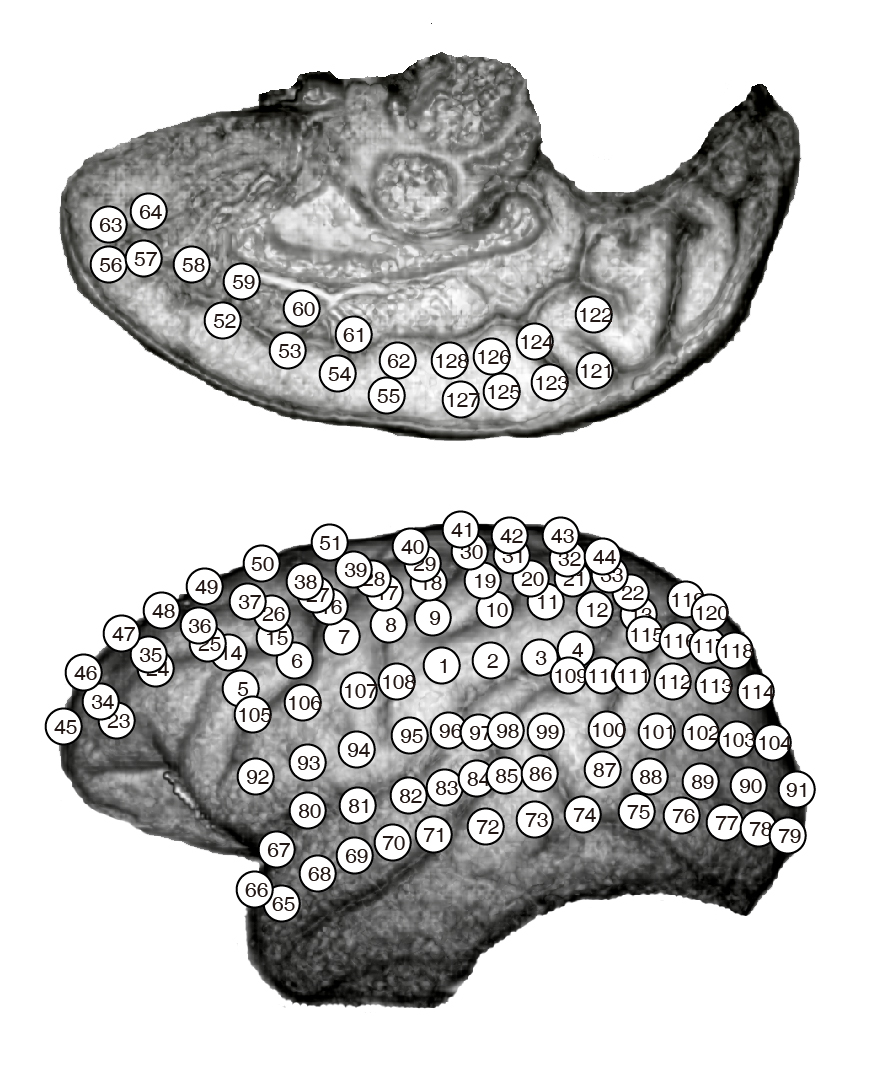

In [2]:
image = Image(filename='ECoG_monkey/brainmap.jpg') 
image

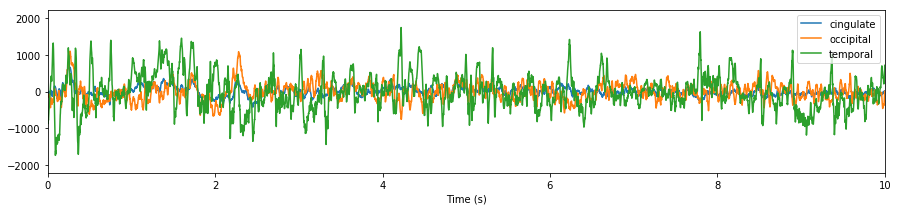

In [3]:
monkey_ecog_data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)

plt.figure(figsize=(15,3))
plt.plot(np.arange(0,monkey_ecog_data['ecog_eyesopen'].shape[1]/monkey_ecog_data['fs'],1/monkey_ecog_data['fs']), 
         monkey_ecog_data['ecog_eyesopen'].T)
plt.xlim([0,10])
plt.xlabel('Time (s)')
plt.legend(monkey_ecog_data['labels'])

<a id='process'></a>

## Data Pre-Processing

In [4]:
eyesopen_cingulate = monkey_ecog_data['ecog_eyesopen'][0,:]
eyesopen_occipital = monkey_ecog_data['ecog_eyesopen'][1,:]
eyesopen_temporal = monkey_ecog_data['ecog_eyesopen'][2,:]


anes_cingulate =  monkey_ecog_data['ecog_anes'][0,:]
anes_occipital =  monkey_ecog_data['ecog_anes'][1,:]
anes_temporal =  monkey_ecog_data['ecog_anes'][2,:]

elec_num = monkey_ecog_data['elec_num']
fs = monkey_ecog_data['fs']
regions = monkey_ecog_data['labels']
states = ['Eyes Open','Anesthesia']
N = eyesopen_cingulate.shape[0]
t_vector = np.arange(0, N/fs, 1/fs)
colors = ['midnightblue','darkmagenta','steelblue','c', 'mediumseagreen', 'gold']

<a id='analyze'></a>

## Data Analysis

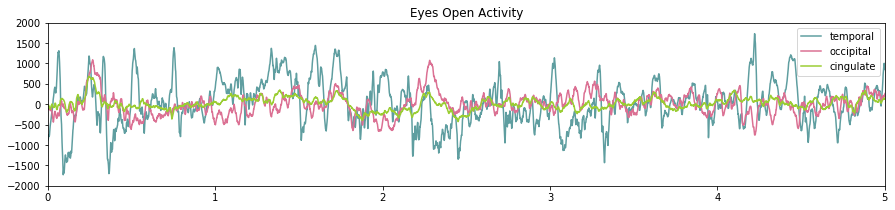

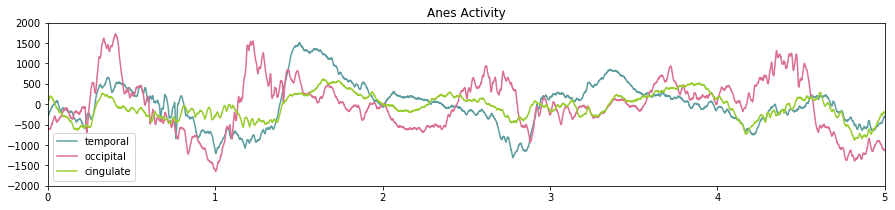

In [23]:
plt.figure(figsize = (15,3))
plt.plot(t_vector, eyesopen_temporal, color = 'cadetblue', label = 'temporal')
plt.plot(t_vector, eyesopen_occipital,color = 'palevioletred', label = 'occipital')
plt.plot(t_vector, eyesopen_cingulate ,color = 'yellowgreen', label = 'cingulate')
plt.title("Eyes Open Activity")
plt.xlim(0,5)
plt.ylim(-2000,2000)
plt.legend()
plt.savefig('img/awake_activity.png')


plt.figure(figsize = (15,3))
plt.plot(t_vector, anes_temporal, color = 'cadetblue', label = 'temporal')
plt.plot(t_vector, anes_occipital,color = 'palevioletred', label = 'occipital')
plt.plot(t_vector, anes_cingulate ,color = 'yellowgreen', label = 'cingulate')
plt.title("Anes Activity")
plt.ylim(-2000,2000)
plt.xlim(0,5)
plt.legend()
plt.savefig('img/anes_activity.png')
plt.show()

### Fourier Transform

In [6]:
def fourier_transforms(data):
    freqs = np.fft.fftfreq(N,1/fs)
    F_lfp_np = np.fft.fft(data)

    plt.figure(figsize=(15,3))
    plt.plot(freqs, F_lfp_np.real, label='Real',alpha=0.5, color = 'yellowgreen')
    plt.xlim([-40,40]);
    plt.xlabel("Frequency")
    plt.ylabel("Values")
    #plt.legend()

    plt.figure(figsize=(15,3))
    plt.plot(freqs, F_lfp_np.imag, label='Imaginary', alpha=0.5, color = 'cadetblue')
    plt.xlim([-40,40]);
    plt.xlabel("Frequency")
    plt.ylabel("Values")

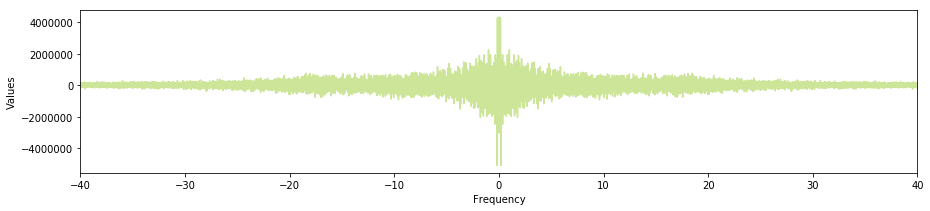

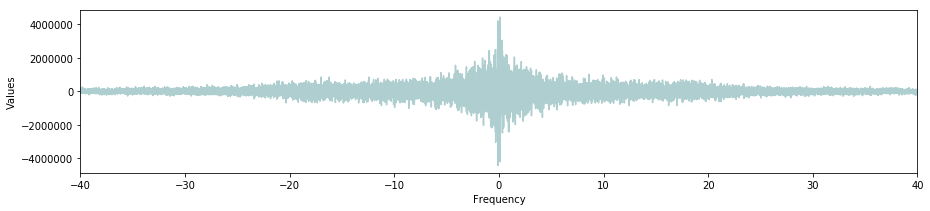

In [24]:
freqs = np.fft.fftfreq(N,1/fs)
F_lfp_np = np.fft.fft(eyesopen_occipital)


plt.figure(figsize=(15,3))
plt.plot(freqs, F_lfp_np.real, label='Real',alpha=0.5, color = 'yellowgreen')
plt.xlim([-40,40]);
plt.xlabel("Frequency")
plt.ylabel("Values")
plt.savefig('img/awake_FT.png')
#plt.legend()

plt.figure(figsize=(15,3))
plt.plot(freqs, F_lfp_np.imag, label='Imaginary', alpha=0.5, color = 'cadetblue')
plt.xlim([-40,40]);
plt.xlabel("Frequency")
plt.ylabel("Values")
plt.savefig('img/anes_FT.png')

### PSD Temporal Vs. Occipital Lobe PSD


### PSD State Comparisons (Eyes Closed, Eyes Open, Anesthesia)

In [8]:
brain_wave_names = ['Delta Component', 'Theta Component', 'Alpha Component', 'Beta Component', 'Gamma Component']
bandpass_values = [[0.5,4], [4,8], [8,13], [13,32], [32,100]]

In [9]:
def return_PSD_data(data, win, overlap):
    f_sp, t_sp, spg_sp = signal.spectrogram(data, fs, window='rect', nperseg=int(fs*win), 
                                            noverlap=overlap)
    spg_sp = spg_sp*fs**2*win/2
    psd_scipy = np.array([i.mean() for i in spg_sp])
    return f_sp, t_sp, spg_sp, psd_scipy

In [10]:
def plot_PSD_state(f_sp, open_psd, anes_psd):
    plt.plot(f_sp, open_psd,label = 'Eyes Open', color = colors[1])
    plt.plot(f_sp, anes_psd,label = 'Anesthesia', color = 'steelblue')
    plt.xlabel("Frequency")
    plt.ylabel("Power Spectral Density")
    plt.yscale("log")
    plt.ylim((pow(10,4),pow(10,11)))
    plt.xlim(0,500)
    plt.legend()
    
def plot_PSD_region(f_sp, temp_psd, occ_psd, cing_psd):
    plt.plot(f_sp, temp_psd,  label = 'Temporal', color = colors[1])
    plt.plot(f_sp, occ_psd, label = 'Occipital', color = colors[3])
    plt.plot(f_sp, cing_psd, label = 'Cingulate', color = colors[4])
    plt.xlabel("Frequency")
    plt.ylabel("Power Spectral Density")
    plt.yscale("log")
    plt.ylim((pow(10,4),pow(10,11)))
    plt.xlim(0,500)
    plt.legend()

In [11]:
win = 1.
over = 0.5
open_temp_f_sp, open_temp_t_sp, open_temp_spg_sp, open_temp_psd = return_PSD_data(eyesopen_temporal, win, over)
anes_temp_f_sp, anes_temp_t_sp, anes_temp_spg_sp, anes_temp_psd = return_PSD_data(anes_temporal,win,over)

open_occ_f_sp, open_occ_t_sp, open_occ_spg_sp, open_occ_psd = return_PSD_data(eyesopen_occipital, win, over)
anes_occ_f_sp, anes_occ_t_sp, anes_occ_spg_sp, anes_occ_psd = return_PSD_data(anes_occipital, win, over)

open_cing_f_sp, open_cing_t_sp, open_cing_spg_sp, open_cing_psd = return_PSD_data(eyesopen_cingulate, win, over)
anes_cing_f_sp, anes_cing_t_sp, anes_cing_spg_sp, anes_cing_psd = return_PSD_data(anes_cingulate, win, over)

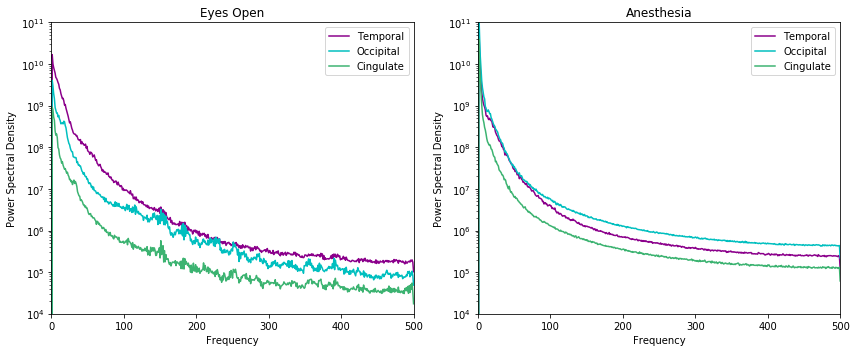

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title(states[0])
plot_PSD_region(open_temp_f_sp, open_temp_psd, open_occ_psd, open_cing_psd)


plt.subplot(1,2,2)
plt.title(states[1])
plot_PSD_region(anes_temp_f_sp, anes_temp_psd, anes_occ_psd, anes_cing_psd)
plt.savefig('img/PSD_awake_anes.png')
plt.tight_layout()

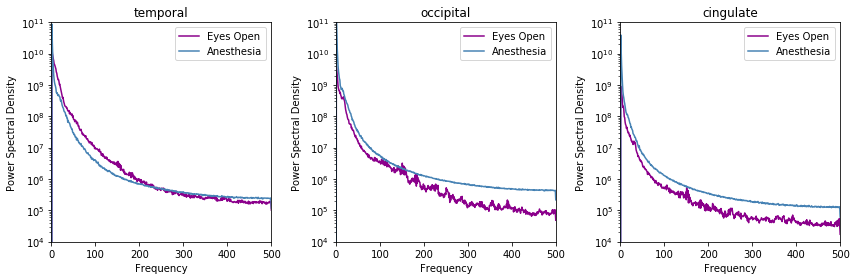

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title(regions[2])
plot_PSD_state(open_temp_f_sp, open_temp_psd, anes_temp_psd)

plt.subplot(1,3,2)
plt.title(regions[1])
plot_PSD_state(open_occ_f_sp, open_occ_psd, anes_occ_psd)

plt.subplot(1,3,3)
plt.title(regions[0])
plot_PSD_state(open_cing_f_sp, open_cing_psd,anes_cing_psd)
plt.savefig('img/PSD_cortices.png')
plt.tight_layout()

### Short-Time Fourier Transform

## Filtering Each Brainwave

We apply a bandpass filter for each of the brainwaves, filtering out the rest of the frequencies.

### Temporal Lobe: Eyes Open State

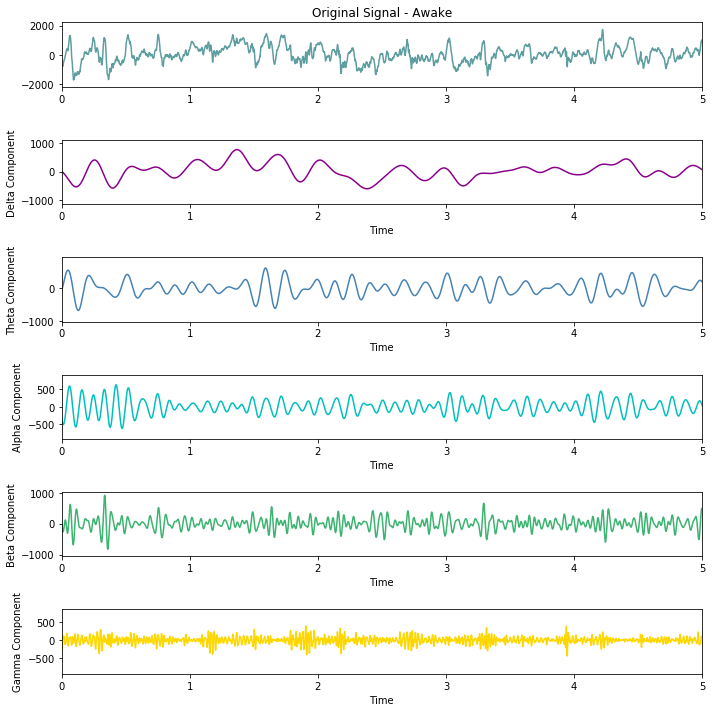

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(6,1,1)
plt.plot(t_vector, eyesopen_temporal, color = 'cadetblue') #plot original signal
plt.title("Original Signal - Awake")
plt.xlim(0,5)


for i in range(5):
    FIR = signal.firwin(751, bandpass_values[i], fs = fs, pass_zero = False)
    oscillation = np.convolve(eyesopen_temporal, FIR, mode='same')
    #plot filtered oscillation across time
    plt.subplot(6,1,i+2)
    plt.plot(t_vector, oscillation, color = colors[i+1])
    plt.xlabel("Time")
    plt.ylabel(brain_wave_names[i])
    plt.xlim(0,5)
plt.savefig('img/STFT_awake.png')    
plt.tight_layout()

## Instantaneous Power Signal for Theta Oscillations 

In this section, we compute the analytic signal (omitting the negative frequencies) and compute the instantaneous power of the theta frequency through time in order to gauge whether or not theta oscillations are regular and continuous for all states. 

In [15]:
#plots the instantaneous power signal for a particular oscillation
def plot_theta_osc(data, cutoff):
    num_rows = 2
    num_columns = 1
    for i in range(num_rows):
        plt.subplot(num_rows,num_columns, i+1)
        FIR_theta_alpha = signal.firwin(800, cutoff, fs=fs, pass_zero=False)
        theta_alpha_osc = np.convolve(data[i], FIR_theta_alpha,mode='same')
        x_a_theta_alpha = signal.hilbert(theta_alpha_osc)
        plt.ylabel("Voltage")
        plt.xlabel("Time")
        plt.title(states[i])
        plt.xlim(0,30)
        theta_power = np.abs(x_a_theta_alpha)**2
        plt.plot(t_vector, theta_power, color = colors[i])
    plt.tight_layout()

### Theta Oscillations in Temporal Cortex

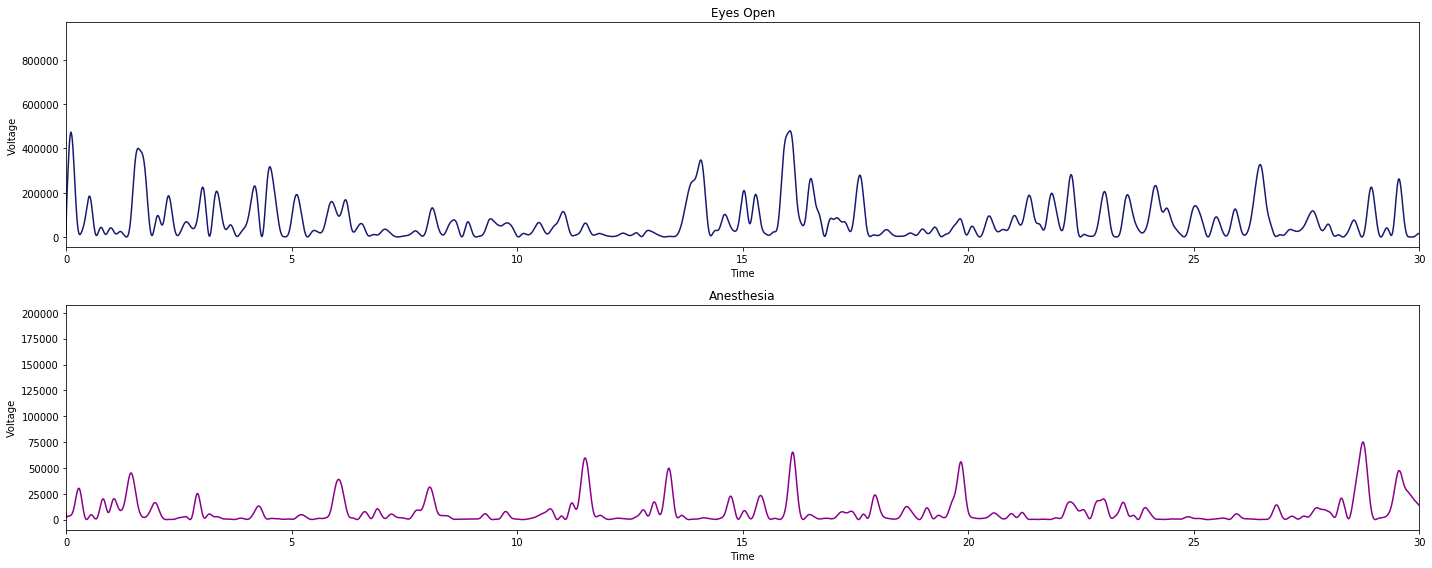

In [16]:
plt.figure(figsize=(20,8))
plot_theta_osc([eyesopen_temporal,  anes_temporal], [4,8])

### Theta Oscillations in Occipital Cortex

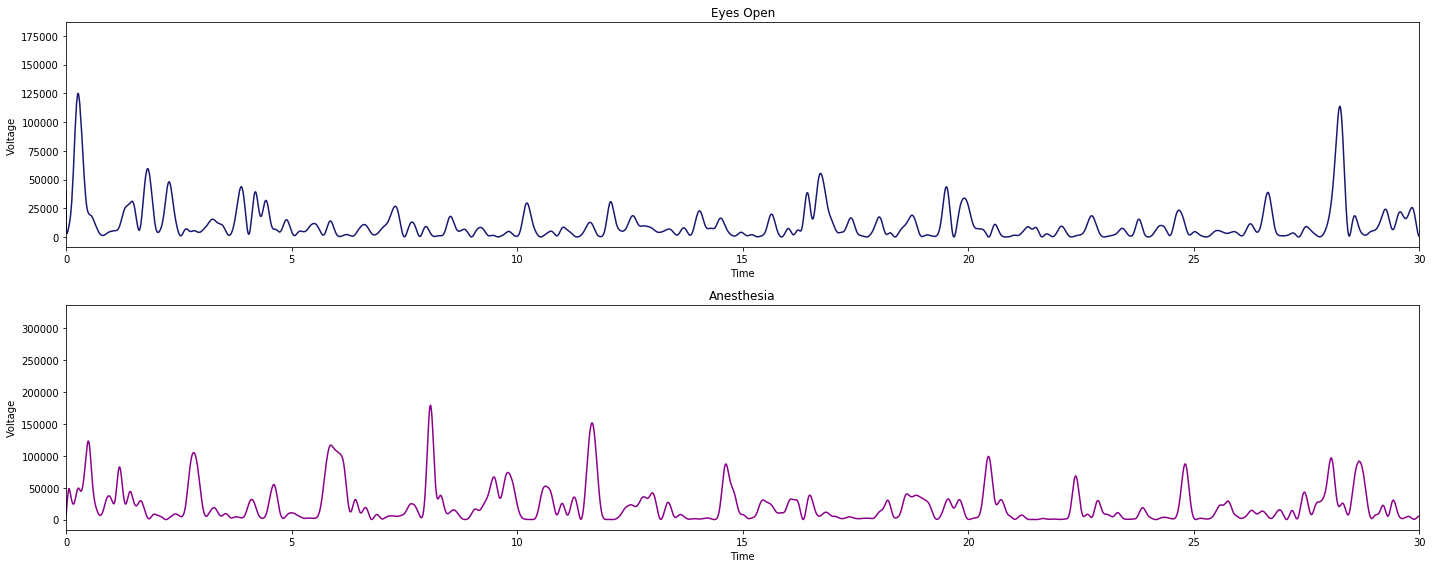

In [17]:
plt.figure(figsize=(20,8))
plot_theta_osc([eyesopen_occipital, anes_occipital], [4,8])

### Theta Oscillations in the Cingulate

Look at the DFT of the theta oscillations to see how frequent the theta oscillations are.

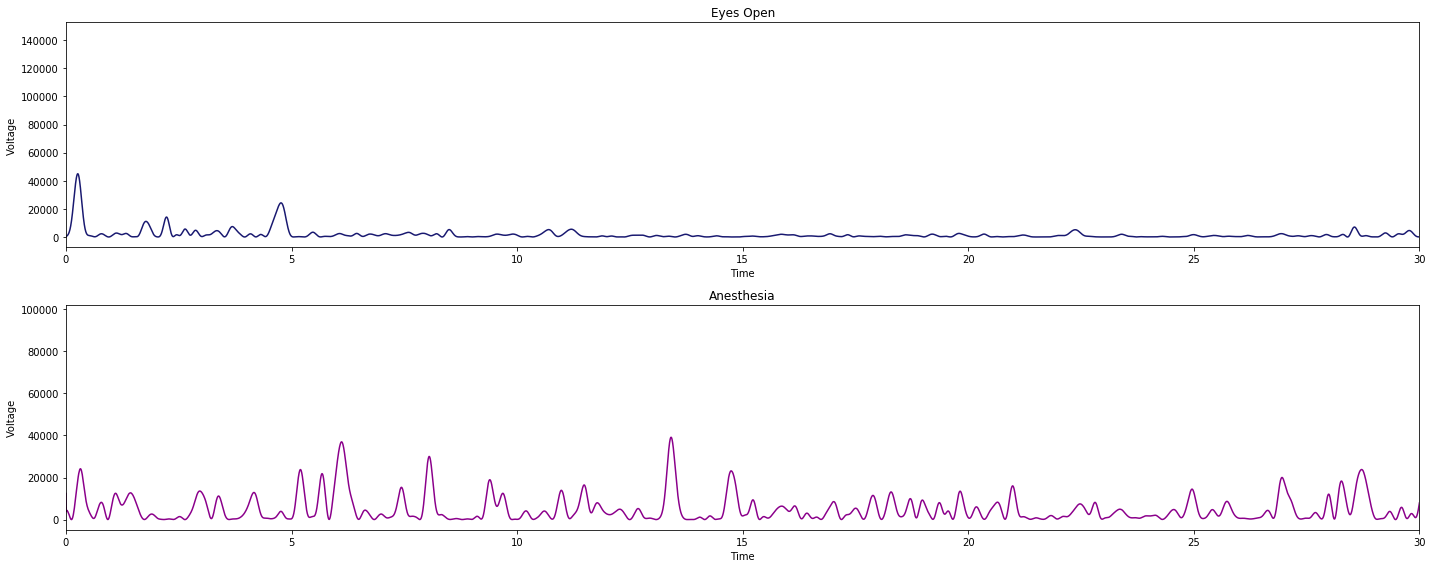

In [18]:
plt.figure(figsize=(20,8))
plot_theta_osc([eyesopen_cingulate, anes_cingulate], [4,8])

In [19]:
FIR_theta_alpha = signal.firwin(800, [4,8], fs=fs, pass_zero=False)
theta_alpha_osc = np.convolve(eyesopen_cingulate, FIR_theta_alpha,mode='same')
x_a_theta = signal.hilbert(theta_alpha_osc)
theta_power = np.abs(x_a_theta_alpha)**2

plt.plot(t_vector, theta_power, color = colors[i])
plt.ylabel("Voltage")
plt.xlabel("Time")
plt.title(states[i])
plt.xlim(0,30)

NameError: name 'x_a_theta_alpha' is not defined

In [ ]:
N = len(theta_power)
freqs = np.fft.fftfreq(N,1/fs)

coef = np.fft.fft(x_a_theta)
ps_theta = np.abs(coef)**2

plt.figure(figsize=(15,8))
plt.plot(freqs, ps_theta, '.', alpha=0.5, label='Cingulate')
plt.xlim(0,10)
plt.xlabel('Signal Frequency')
plt.ylabel('Power')
plt.title('Theta Oscillation in Cingulate')
plt.legend()

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(4,1,1)
plt.plot(t_vector, eyesopen_temporal, color = 'cadetblue', label='Original')
plt.xlim(0,2)


FIR_theta_alpha = signal.firwin(751, [4,8], fs=fs, pass_zero=False)
theta_alpha_osc = np.convolve(eyesopen_temporal, FIR_theta_alpha,mode='same')
x_a_theta_alpha = signal.hilbert(theta_alpha_osc)

plt.subplot(4,1,2)
plt.plot(t_vector, theta_alpha_osc,color = 'palevioletred', label='Filtered')
plt.plot(t_vector, eyesopen_temporal, color = 'cadetblue', label='Original')
plt.ylabel("Signal")
plt.xlabel("Time")
plt.title("Eyes Open Temporal")
plt.xlim(0,2)
plt.legend()

FIR_theta_alpha = signal.firwin(751, [8 ,13], fs=fs, pass_zero=False)
theta_alpha_osc = np.convolve(eyesopen_temporal, FIR_theta_alpha,mode='same')
x_a_theta_alpha = signal.hilbert(theta_alpha_osc)


plt.subplot(4,1,3)
plt.plot(t_vector, theta_alpha_osc,color = 'palevioletred', label='Filtered')
plt.plot(t_vector, eyesopen_temporal, color = 'cadetblue', label='Original')
plt.ylabel("Signal")
plt.xlabel("Time")
plt.title("Eyes Open Temporal")
plt.xlim(0,2)
plt.legend()

FIR_theta_alpha = signal.firwin(751, [0.5 ,4], fs=fs, pass_zero=False)
theta_alpha_osc = np.convolve(eyesopen_temporal, FIR_theta_alpha,mode='same')
x_a_theta_alpha = signal.hilbert(theta_alpha_osc)


plt.subplot(4,1,4)
plt.plot(t_vector, theta_alpha_osc,color = 'palevioletred', label='Filtered')
plt.plot(t_vector, eyesopen_temporal, color = 'cadetblue', label='Original')

plt.ylabel("Signal")
plt.xlabel("Time")
plt.title("Eyes Open Temporal")
plt.xlim(0,2)
plt.legend()
plt.tight_layout()

In [ ]:
def compute_power_phase(x_a):
     
    return (np.abs(x_a)**2), np.angle(x_a)

#theta_power, theta_phase = compute_power_phase(x_a_theta)

In [ ]:
# compute gamma power and phase
FIR_gamma =  signal.firwin(251, [20,40], fs=fs, pass_zero=False)
gamma_osc = np.convolve(eyesopen_occipital, FIR_gamma,mode='same')
x_a_gamma = signal.hilbert(gamma_osc)
gamma_power, gamma_phase =  compute_power_phase(x_a_gamma)
theta_power, theta_phase =  compute_power_phase(x_a_theta_alpha)


peak_inds = np.where(np.logical_and(theta_phase>-np.pi/2, theta_phase<np.pi/2))[0][0:30000]
trough_inds = np.where(np.logical_or(theta_phase<-np.pi/2, theta_phase>np.pi/2))[0][0:30000]

plt.figure(figsize=(15,3))

# plot the theta peak and trough phases
plt.plot(t_vector[peak_inds], theta_phase[peak_inds], '.', color = 'lightblue', label = 'Theta Peak')
plt.plot(t_vector[trough_inds], theta_phase[trough_inds], '.', color = 'lightpink', label = 'Theta Trough')

# plot the gamma power corresponding to theta peak and trough phases
plt.plot(t_vector[peak_inds], gamma_power[peak_inds], '.', color = 'cadetblue', label ='Gamma Peak')
plt.plot(t_vector[trough_inds], gamma_power[trough_inds], '.', color = 'palevioletred', label = 'Gamma Trough')
plt.xlabel("Time (s)")
#plt.ylabel("")
#plt.xlim(0,2)
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist((gamma_power[peak_inds])**(1/2), 100, color='cadetblue',normed=True, histtype='step', label='Peak');
plt.hist((gamma_power[trough_inds])**(1/2), 100, color='palevioletred',normed=True, histtype='step', label='Trough');
plt.ylabel("Frequency")
plt.xlabel("Amplitude")
plt.legend()
#plt.xlim(0,2)


In [ ]:
# compute gamma power and phase
FIR_gamma =  signal.firwin(251, [20,40], fs=fs, pass_zero=False)
gamma_osc = np.convolve(eyesopen_occipital, FIR_gamma,mode='same')
x_a_gamma = signal.hilbert(gamma_osc)
gamma_power, gamma_phase =  compute_power_phase(x_a_gamma)

peak_inds = np.where(np.logical_and(theta_phase>-np.pi/2, theta_phase<np.pi/2))[0]
trough_inds = np.where(np.logical_or(theta_phase<-np.pi/2, theta_phase>np.pi/2))[0]

plt.figure(figsize=(15,3))

# plot the theta peak and trough phases
plt.plot(t_vector[peak_inds], theta_phase[peak_inds], '.', color = 'lightblue', label = 'Theta Peak')
plt.plot(t_vector[trough_inds], theta_phase[trough_inds], '.', color = 'lightpink', label = 'Theta Trough')

# plot the gamma power corresponding to theta peak and trough phases
plt.plot(t_vector[peak_inds], gamma_power[peak_inds], '.', color = 'cadetblue', label ='Gamma Peak')
plt.plot(t_vector[trough_inds], gamma_power[trough_inds], '.', color = 'palevioletred', label = 'Gamma Trough')
plt.xlabel("Time (s)")
#plt.ylabel("")
plt.xlim(0,2)
plt.legend()

plt.figure(figsize=(5,5))
# complete the function call to plot the histogram
plt.hist((gamma_power[peak_inds])**(1/2), 100, color='cadetblue',normed=True, histtype='step', label='Peak');
plt.hist((gamma_power[trough_inds])**(1/2), 100, color='palevioletred',normed=True, histtype='step', label='Trough');
plt.ylabel("Frequency")
plt.xlabel("Amplitude")
plt.legend()
#plt.xlim(0,2)


In [ ]:
# implementation of fast cross-correlation
# np.convolve will always compute for all lag times, which is unwieldy with a long signal
# we usually just want the first few lags
def xcorr(data1, data2, maxlag=100, zero_center=False):
    acf = np.zeros(maxlag)
    acf[0] = np.correlate(data1,data2)
    for lag in range(1,maxlag):
        acf[lag] = np.correlate(data1[:-lag],data2[lag:])
    
    acf /= acf[0]
    if zero_center: acf[0]=np.nan
    return acf
plt.subplot(1,3,3)
plt.plot(t_ac, xcorr(spike_count, lfp, maxlag, True), '.')
plt.title('Spike Count-LFP Cross-correlation')

<a id='results'></a>

## Data Results


<a id='conclude'></a>

## Conclusion & Discussions

<a id='considerations'></a>
## Considerations & Limitations

In [ ]:
FIR_theta_alpha = signal.firwin(751, [1,8], fs=fs, pass_zero=False)
theta_alpha_osc = np.convolve(eyesopen_occipital, FIR_theta_alpha,mode='same')
x_a_theta_alpha = signal.hilbert(theta_alpha_osc)
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
# plot the signal and the filtered signal
plt.plot(t_vector, eyesopen_occipital, color = 'cadetblue', label='Original')
plt.plot(t_vector, theta_alpha_osc,color = 'palevioletred', label='Filtered')
plt.ylabel("Signal")
plt.xlabel("Time")
plt.xlim(0,2)
plt.legend()



FIR_alpha = signal.firwin(2000, [1,13], fs=fs, pass_zero=False)
alpha_osc = np.convolve(eyesclosed_occipital, FIR_alpha,mode='same')
x_a_alpha = signal.hilbert(alpha_osc)

plt.subplot(2,1,2)
# plot the signal and the filtered signal
plt.plot(t_vector, eyesclosed_occipital, color = 'cadetblue', label='Original')
plt.plot(t_vector, alpha_osc,color = 'palevioletred', label='Filtered')
plt.ylabel("Signal")
plt.xlabel("Time")
plt.xlim(0,2)
plt.legend()

In [ ]:
FIR_theta_alpha = signal.firwin(751, [1,10], fs=fs, pass_zero=False)
theta_alpha_osc = np.convolve(eyesopen_temporal, FIR_theta_alpha,mode='same')
x_a_theta_alpha = signal.hilbert(theta_alpha_osc)
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
# plot the signal and the filtered signal
plt.plot(t_vector, eyesopen_temporal, color = 'cadetblue', label='Original')
plt.plot(t_vector, theta_alpha_osc,color = 'palevioletred', label='Filtered')
plt.ylabel("Signal")
plt.xlabel("Time")
plt.title("Eyes Open Temporal")
plt.xlim(0,2)
plt.legend()



FIR_alpha = signal.firwin(2000, [1,13], fs=fs, pass_zero=False)
alpha_osc = np.convolve(eyes_closed_temporal, FIR_alpha,mode='same')
x_a_alpha = signal.hilbert(alpha_osc)

plt.subplot(2,1,2)
# plot the signal and the filtered signal
plt.plot(t_vector, eyes_closed_temporal, color = 'cadetblue', label='Original')
plt.plot(t_vector, alpha_osc,color = 'palevioletred', label='Filtered')
plt.ylabel("Signal")
plt.xlabel("Time")
plt.title("Eyes Closed Temporal")
plt.xlim(0,2)
plt.legend()
plt.tight_layout()

<a id='refer'></a>
## References & Contributions